In [10]:
from __future__ import division                                         
import tensorflow as tf                                                 
tf.set_random_seed(1) 

import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad, Adam
from keras.utils import np_utils, generic_utils, to_categorical
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
import sys
import pickle

print ("Import Successful")

Import Successful


If want to train for 2 second utterances use '13L_2sec_mel_spectrograms.pickle' otherwise use '13L_mel_spectrograms.pickle'

In [11]:
with open('13L_2sec_mel_spectrograms.pickle','rb') as f:
    corpus,targets = pickle.load(f,encoding='latin1')


xtrain, xtest, ytrain, ytest = train_test_split(corpus, targets, test_size=0.2, random_state=42)
print('Training data dimensions : {}'.format(xtrain.shape))
print('Test data : {}'.format(xtest.shape))

Training data dimensions : (13062, 128, 87, 1)
Test data : (3266, 128, 87, 1)


In [14]:
# create model
model = Sequential()
    
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=xtrain[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))

model.add(Dense(13, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

# Train the model
model.fit(xtrain, to_categorical(ytrain),batch_size=512,shuffle=True,epochs=100,verbose=1,callbacks=[EarlyStopping(min_delta=0.001, patience=3)])


Epoch 1/100
13062/13062 [==============================] - 5s 364us/step - loss: 9.7638 - acc: 0.1067
Epoch 2/100
13062/13062 [==============================] - 3s 256us/step - loss: 7.7011 - acc: 0.1418
Epoch 3/100
13062/13062 [==============================] - 3s 250us/step - loss: 6.0462 - acc: 0.1572
Epoch 4/100
13062/13062 [==============================] - 3s 260us/step - loss: 4.8546 - acc: 0.1588
Epoch 5/100
13062/13062 [==============================] - 4s 273us/step - loss: 3.8709 - acc: 0.1608
Epoch 6/100
13062/13062 [==============================] - 3s 261us/step - loss: 3.3083 - acc: 0.1563
Epoch 7/100
13062/13062 [==============================] - 3s 267us/step - loss: 2.9873 - acc: 0.1538
Epoch 8/100
13062/13062 [==============================] - 3s 265us/step - loss: 2.7997 - acc: 0.1783
Epoch 9/100
13062/13062 [==============================] - 3s 258us/step - loss: 2.6897 - acc: 0.1965
Epoch 10/100
13062/13062 [==============================] - 3s 257us/step - loss: 

13062/13062 [==============================] - 4s 270us/step - loss: 1.0669 - acc: 0.6613
Epoch 81/100
13062/13062 [==============================] - 4s 276us/step - loss: 1.0346 - acc: 0.6719
Epoch 82/100
13062/13062 [==============================] - 4s 276us/step - loss: 1.0315 - acc: 0.6766
Epoch 83/100
13062/13062 [==============================] - 3s 259us/step - loss: 1.0162 - acc: 0.6764
Epoch 84/100
13062/13062 [==============================] - 3s 262us/step - loss: 1.0053 - acc: 0.6776
Epoch 85/100
13062/13062 [==============================] - 4s 307us/step - loss: 0.9879 - acc: 0.6885
Epoch 86/100
13062/13062 [==============================] - 4s 277us/step - loss: 0.9884 - acc: 0.6864
Epoch 87/100
13062/13062 [==============================] - 4s 271us/step - loss: 0.9758 - acc: 0.6906
Epoch 88/100
13062/13062 [==============================] - 4s 279us/step - loss: 0.9602 - acc: 0.6922
Epoch 89/100
13062/13062 [==============================] - 4s 293us/step - loss: 0.95

In [15]:
# Evaluate the model
scores = model.evaluate(xtest, to_categorical(ytest))
print('Loss: {}'.format(scores[0]))
print('Accuracy: {}'.format(scores[1]))

3266/3266 [==============================] - 1s 249us/step
Loss: 1.0425701995459495
Accuracy: 0.6677893447642376


In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 85, 32)       320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 42, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 63, 42, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 20, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 20, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 18, 16)        4624      
__________

In [17]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

ypred = model.predict(xtest)

ypred_enc = np.argmax(ypred, axis=1)
print('Predicted Labels dimensions : {}'.format(ypred_enc.shape))
print(confusion_matrix(ytest,ypred_enc))

Predicted Labels dimensions : (3266,)
[[182  11   5   3  23   3   1   0   0   6   2   4   5]
 [  1 170   2   9   3  10   1  21   0   3   7   2  12]
 [  4  11 128  13  13  21   1   7   5  12  25   6   7]
 [  0   2   2 217   0   2   2   2   4  18   9   0  10]
 [  7   2   5   0 139  60   5   0   0   2  13  10  18]
 [  0   2   0   2   0 213   0   0   4   3   0   0   0]
 [  2   9   1   9   8  12 197   4   3   7   2   5   0]
 [  3  24   2   2   3   4   2 236   0   4   0   0   4]
 [  4   2   7  22   7  31  12   1  82  68   2   3  16]
 [  0   8   8  21  10  20  15   7  35 106   4   4  10]
 [  1   1   4   2   3   5   0   5   2   2 180  10  14]
 [  3   2   7   9   2   9  12   4   1   0  37 136  16]
 [  0   2   0   1   1  24   1   0   1   2  20  12 195]]


AxesSubplot(0.125,0.125;0.62x0.755)


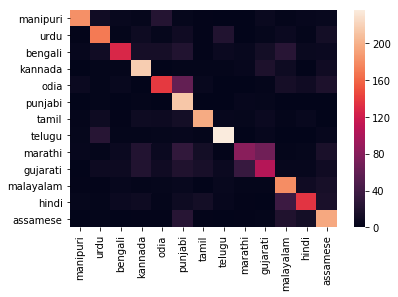

In [19]:
import seaborn as sns

class_names = []
data_folder='13_language_dataset'
for lang in os.listdir(data_folder):
    if not lang.startswith('.'):
        class_names.append(lang)

class_names = np.asarray(class_names)

fig = sns.heatmap(confusion_matrix(ytest,ypred_enc),xticklabels=class_names,yticklabels=class_names)

print(fig)

In [23]:
fig.get_figure().savefig('2sec_heatmap.png')